In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Attribute Information

1. variance of Wavelet Transformed image (continuous)
2. skewness of Wavelet Transformed image (continuous)
3. curtosis of Wavelet Transformed image (continuous)
4. entropy of image (continuous)
5. class (integer)

In [2]:
colnames=["Variance","Skewness","Curtosis","Entropy","Target"]    #adding column namnes as it was missing in the dataset
ds_bank=pd.read_csv("Bank_Notes.csv",names=colnames,header=None)
ds_bank

,Variance,Skewness,Curtosis,Entropy,Target
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [3]:
ds_bank.shape

(1372, 5)

In [4]:
ds_bank.columns

Index(['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Target'], dtype='object')

### Checking Null Values

In [5]:
ds_bank.isnull().sum()   #no null values

Variance    0
Skewness    0
Curtosis    0
Entropy     0
Target      0
dtype: int64

In [6]:
ds_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Curtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
 4   Target    1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


### Plotting Correlation

In [7]:
ds_bank.corr()

,Variance,Skewness,Curtosis,Entropy,Target
Variance,1.000000,0.264026,-0.380850,0.276817,-0.724843
Skewness,0.264026,1.000000,-0.786895,-0.526321,-0.444688
Curtosis,-0.380850,-0.786895,1.000000,0.318841,0.155883
Entropy,0.276817,-0.526321,0.318841,1.000000,-0.023424
Target,-0.724843,-0.444688,0.155883,-0.023424,1.000000


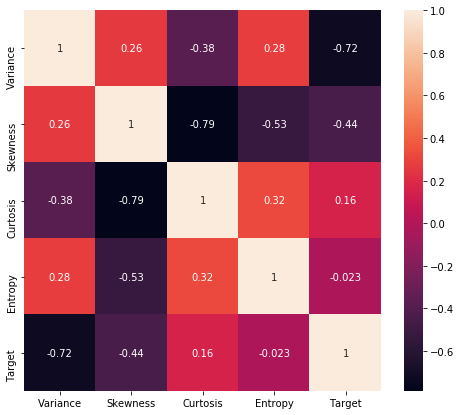

In [8]:
corr_hmap=ds_bank.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

### Plotting Distribution

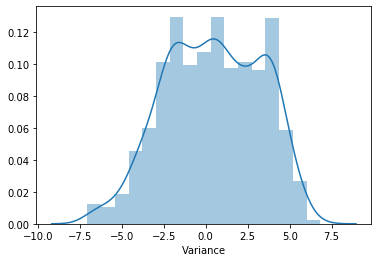

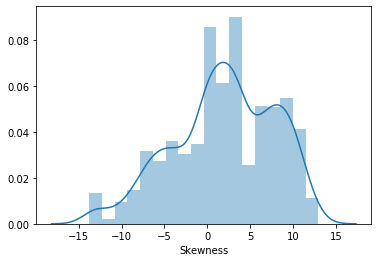

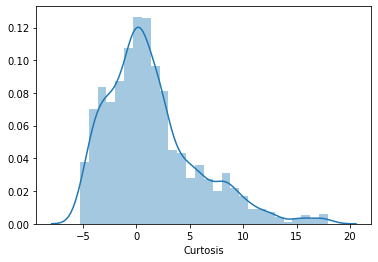

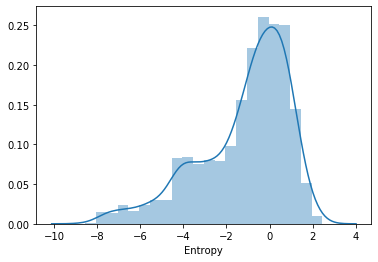

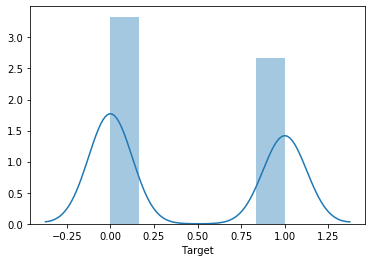

In [9]:
for i in ds_bank.columns:
    plt.figure()
    sns.distplot(ds_bank[i])

In [10]:
ds_bank.skew()

Variance   -0.149388
Skewness   -0.394103
Curtosis    1.088569
Entropy    -1.022243
Target      0.223191
dtype: float64

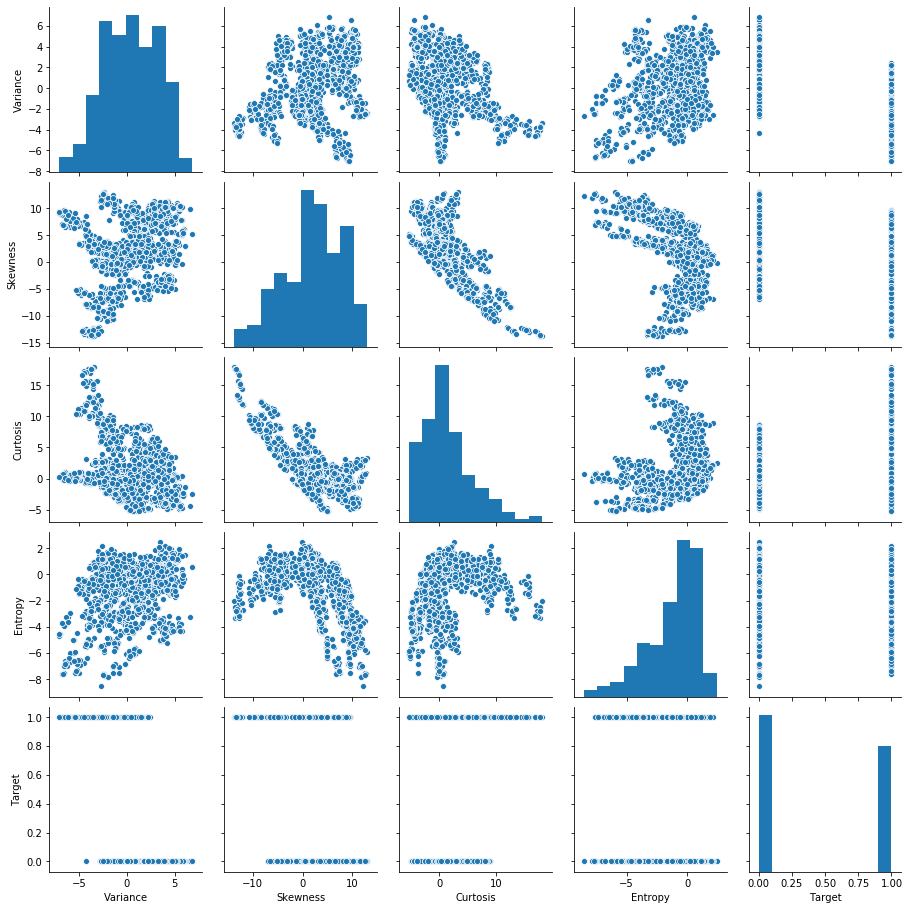

In [11]:
sns.pairplot(ds_bank)

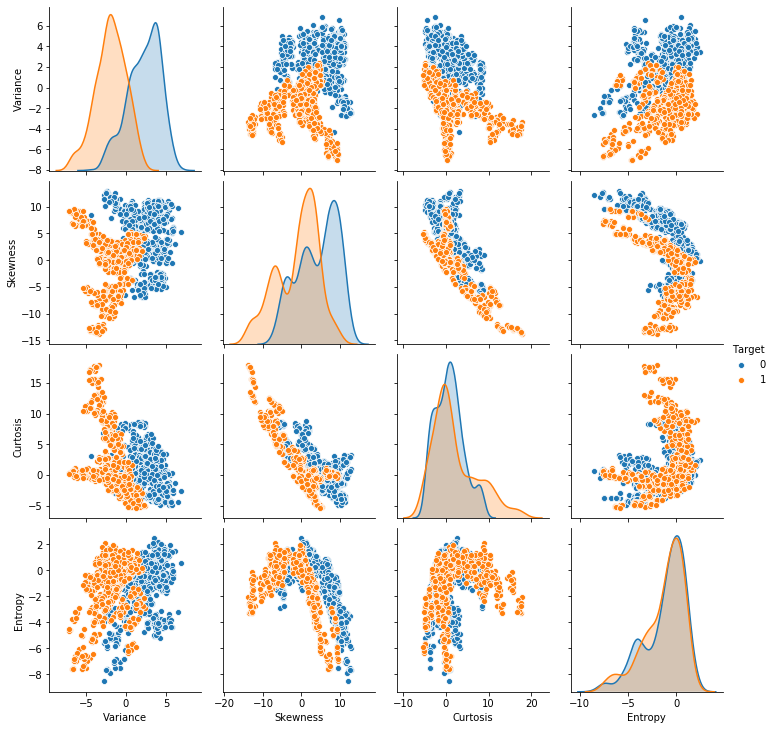

In [12]:
sns.pairplot(ds_bank,hue="Target")

### Seperating Input and Target Variable

In [13]:
ds_x=ds_bank.iloc[:,0:-1]
ds_x

,Variance,Skewness,Curtosis,Entropy
0,3.62160,8.66610,-2.8073,-0.44699
1,4.54590,8.16740,-2.4586,-1.46210
2,3.86600,-2.63830,1.9242,0.10645
3,3.45660,9.52280,-4.0112,-3.59440
4,0.32924,-4.45520,4.5718,-0.98880
...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949
1368,-1.38870,-4.87730,6.4774,0.34179
1369,-3.75030,-13.45860,17.5932,-2.77710
1370,-3.56370,-8.38270,12.3930,-1.28230


In [14]:
y=pd.DataFrame(ds_bank.iloc[:,-1])
y

,Target
0,0
1,0
2,0
3,0
4,0
...,...
1367,1
1368,1
1369,1
1370,1


### Scaling Input Variable

In [15]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(ds_x)
x=pd.DataFrame(ds_x)
x

,Variance,Skewness,Curtosis,Entropy
0,3.62160,8.66610,-2.8073,-0.44699
1,4.54590,8.16740,-2.4586,-1.46210
2,3.86600,-2.63830,1.9242,0.10645
3,3.45660,9.52280,-4.0112,-3.59440
4,0.32924,-4.45520,4.5718,-0.98880
...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949
1368,-1.38870,-4.87730,6.4774,0.34179
1369,-3.75030,-13.45860,17.5932,-2.77710
1370,-3.56370,-8.38270,12.3930,-1.28230


### Importing Classification Algorithims

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB     #because we have a binary classification in this not Multinomial
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

### Splitting Training and Testing

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=9,stratify=y)

### Putting Aliases

In [18]:
knn=KNeighborsClassifier(n_neighbors=6)
svc=SVC()
lr=LogisticRegression()
dtc=DecisionTreeClassifier(random_state=6)
gnb=GaussianNB()

### Appending Models 

In [19]:
models=[]
models.append(("KNeighborsClassifier",knn))
models.append(("SVC",svc))
models.append(("LogisticRegression",lr))
models.append(("DecisionTreeClassifier",dtc))
models.append(("GaussianNB",gnb))

### Importing Metrics

In [20]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

******************* KNeighborsClassifier *********************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')


Accuracy_score= 1.0


Cross_val_score= 1.0


roc_auc_score= 1.0


classification_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       229
           1       1.00      1.00      1.00       183

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



[[229   0]
 [  0 183]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



******************* SVC *********************


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrin

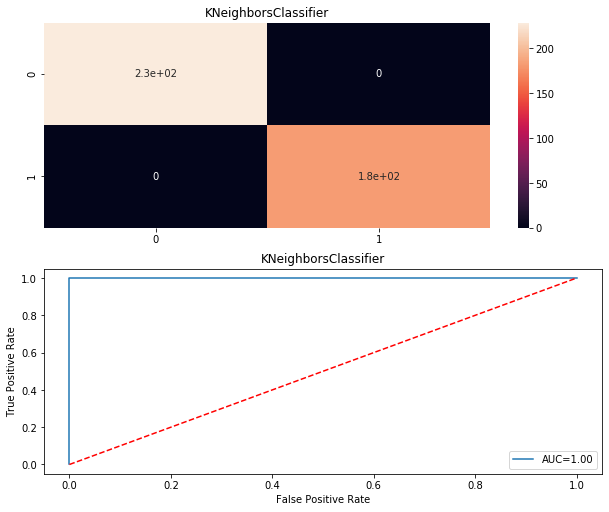

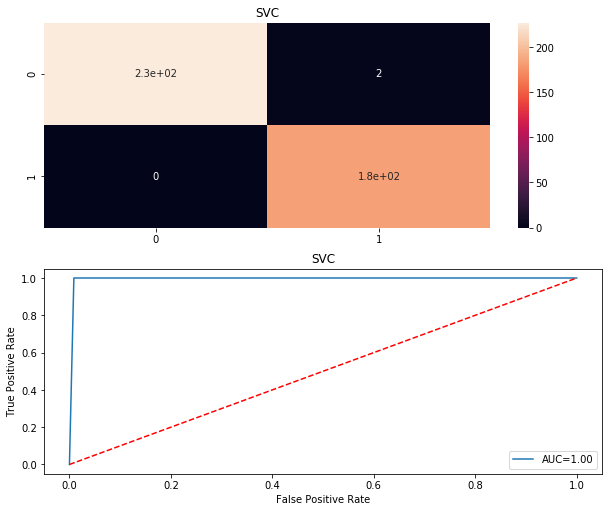

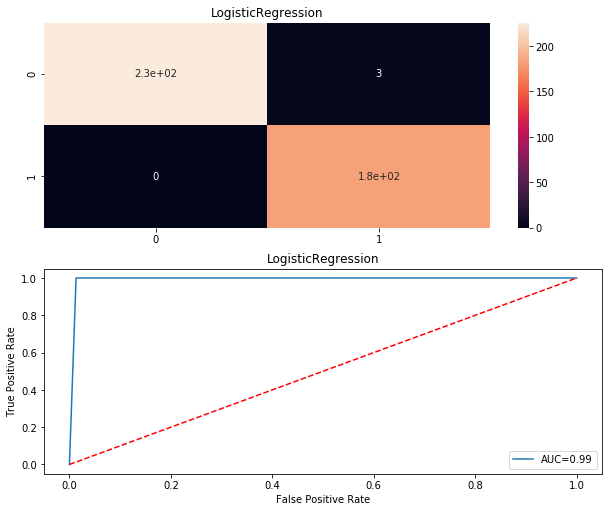

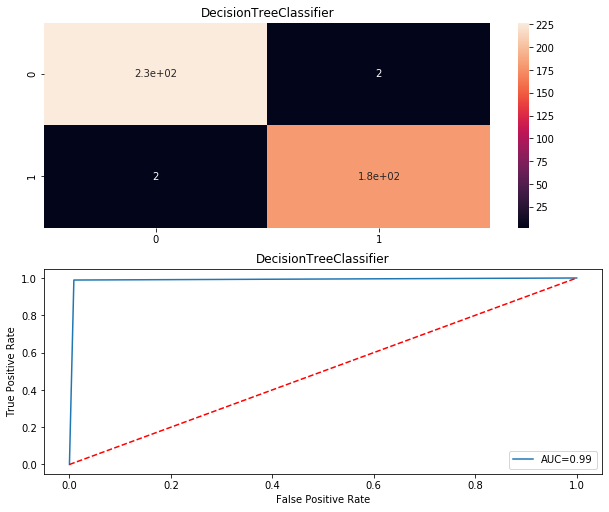

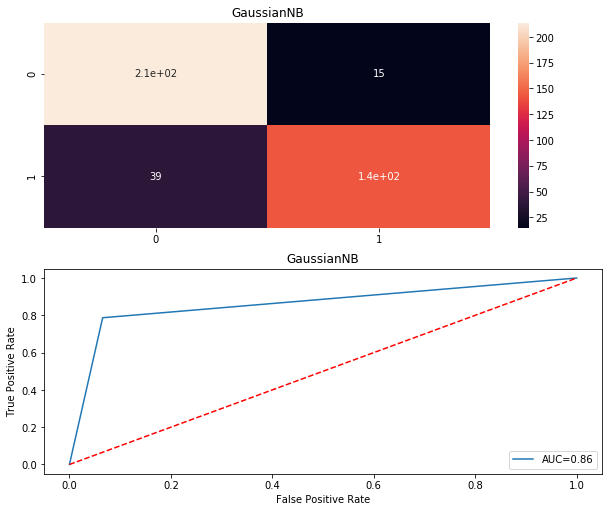

In [23]:
Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print("*******************",name,"*********************")
    print("\n")
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print("\n")
    AS=accuracy_score(y_test,pred)
    print("Accuracy_score=",AS)
    score.append(AS*100)
    print("\n")
    sc= cross_val_score(model,x,y,cv=10,scoring="accuracy").mean()
    print("Cross_val_score=",sc)
    cvs.append(sc*100)
    print("\n")
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pred)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print("roc_auc_score=",roc_auc)
    rocscore.append(roc_auc*100)
    print("\n")
    print("classification_report\n",classification_report(y_test,pred))
    print("\n")
    cm=confusion_matrix(y_test,pred)
    print(cm)
    print("\n")
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label="AUC=%0.2f"% roc_auc)
    plt.plot([0,1],[0,1],"r--")
    plt.legend(loc="lower right")
    plt.ylabel("True Positive Rate")
    plt.xlabel("False Positive Rate")
    print("\n\n")

### Creating Compare DataFrame

In [24]:
results=pd.DataFrame({"Model":Model,"Accuracy_Score":score,"Cross_Val_Score":cvs,"Roc_Auc_Score":rocscore})
results

,Model,Accuracy_Score,Cross_Val_Score,Roc_Auc_Score
0,KNeighborsClassifier,100.000000,100.000000,100.000000
1,SVC,99.514563,99.635036,99.563319
2,LogisticRegression,99.271845,98.979689,99.344978
3,DecisionTreeClassifier,99.029126,98.541733,99.016871
4,GaussianNB,86.893204,84.107691,86.069153


In [26]:
#According to the above observation the KneighborsClassifier works the best ith this Dataset

### Saving Model

In [30]:
from joblib import dump,load
dump(svc,"Model_Bank_Note_Authentication.csv")

['Model_Bank_Note_Authentication.csv']

### Loading Model

In [32]:
model=load("Model_Bank_Note_Authentication.csv")

In [34]:
model.predict(x_test)

array([0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,